# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
l_df=pd.read_csv(r"C:\Users\2\Downloads\Loan payments data.csv")

In [3]:
l_df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
loan=l_df.describe(include="all")
loan

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
count,500,500,500.000000,500.000000,500,500,400,200.00000,500.000000,500,500
unique,500,3,NaN,NaN,7,25,320,NaN,NaN,4,2
top,xqd20166231,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,9/26/2016 9:00,NaN,NaN,college,male
freq,1,300,NaN,NaN,231,123,9,NaN,NaN,220,423
mean,NaN,NaN,943.200000,22.824000,NaN,NaN,NaN,36.01000,31.116000,NaN,NaN
std,NaN,NaN,115.240274,8.000064,NaN,NaN,NaN,29.38088,6.084784,NaN,NaN
min,NaN,NaN,300.000000,7.000000,NaN,NaN,NaN,1.00000,18.000000,NaN,NaN
25%,NaN,NaN,1000.000000,15.000000,NaN,NaN,NaN,3.00000,27.000000,NaN,NaN
50%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,37.00000,30.000000,NaN,NaN
75%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,60.00000,35.000000,NaN,NaN


In [5]:
l_df.shape

(500, 11)

In [6]:
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [7]:
l_df.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

# Data Pre-Processing

### a) Missing Values Handling

In [8]:
l_df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [9]:
for x in l_df:
    print([x])
    print(l_df[x].unique())
    print(l_df[x].nunique())

['Loan_ID']
['xqd20166231' 'xqd20168902' 'xqd20160003' 'xqd20160004' 'xqd20160005'
 'xqd20160706' 'xqd20160007' 'xqd20160008' 'xqd20160909' 'xqd20160010'
 'xqd20160011' 'xqd20160012' 'xqd20160013' 'xqd20160014' 'xqd20160015'
 'xqd20160016' 'xqd20160017' 'xqd20160018' 'xqd20160019' 'xqd20160020'
 'xqd20160021' 'xqd20160022' 'xqd20160023' 'xqd20160024' 'xqd20160025'
 'xqd20160026' 'xqd20160027' 'xqd20170088' 'xqd20160029' 'xqd20160030'
 'xqd88160031' 'xqd20160032' 'xqd20160033' 'xqd22169034' 'xqd20160035'
 'xqd20160036' 'xqd20160037' 'xqd20160038' 'xqd20160039' 'xqd20160040'
 'xqd20160041' 'xqd20160042' 'xqd20160043' 'xqd20160044' 'xqd20160045'
 'xqd20160046' 'xqd20160047' 'xqd20160048' 'xqd20160049' 'xqd20160050'
 'xqd20160051' 'xqd20160052' 'xqd20160053' 'xqd20160054' 'xqd20160055'
 'xqd20160056' 'xqd20160057' 'xqd20160058' 'xqd20160059' 'xqd20160060'
 'xqd20160061' 'xqd20160062' 'xqd20160063' 'xqd20160064' 'xqd20160065'
 'xqd20160066' 'xqd20160067' 'xqd20160068' 'xqd20160069' 'xqd2016

# Data pre-processing

## a) Missing values handling

In [10]:
l_df['paid_off_time']=l_df['paid_off_time'].fillna(l_df['paid_off_time'].mode()[0])

In [11]:
l_df['past_due_days'].fillna(l_df['past_due_days'].median(),inplace=True)

C:\Users\2\AppData\Local\Temp\ipykernel_20292\2788542390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  l_df['past_due_days'].fillna(l_df['past_due_days'].median(),inplace=True)


In [12]:
l_df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

##### filling missing payoff dates with the due date.
##### setting overdue days to 0 for loans that are paid off but have no delay recorded.
##### using -1 to indicate overdue days for loans that haven't been paid off yet or have unknown status.

In [13]:
l_df.groupby('education')['age'].mean()

education
Bechalor                32.134328
High School or Below    31.377990
Master or Above         40.250000
college                 30.390909
Name: age, dtype: float64

###### the average past due days,loan terms, and borrower age very by education level. Genarally borrowers with higher education tend to have fewer overdue days and shorter loan terms, indicating better repayment behavior and possibly different borrowing needs. age difference reflect typical demographic patterns within each education group

In [14]:
l_df.groupby ('education')[['past_due_days','terms','past_due_days','age']].mean()

,past_due_days,terms,past_due_days,age
education,,,,
Bechalor,35.716418,21.462687,35.716418,32.134328
High School or Below,38.000000,23.631579,38.000000,31.377990
Master or Above,46.250000,11.000000,46.250000,40.250000
college,35.372727,22.686364,35.372727,30.390909


### b) Outlier detection and handling

<Axes: xlabel='past_due_days', ylabel='Count'>

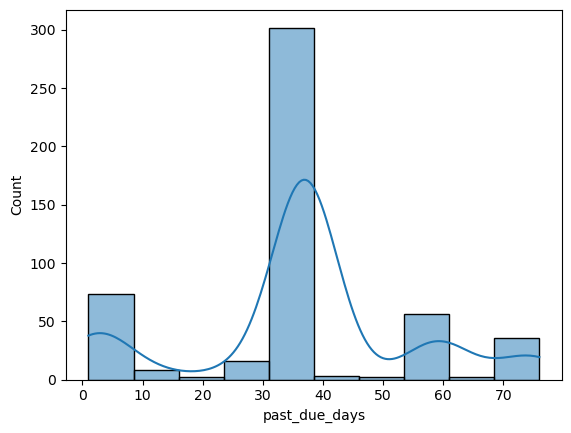

In [15]:
sns.histplot(l_df['past_due_days'],kde=True)


<Axes: xlabel='loan_status', ylabel='terms'>

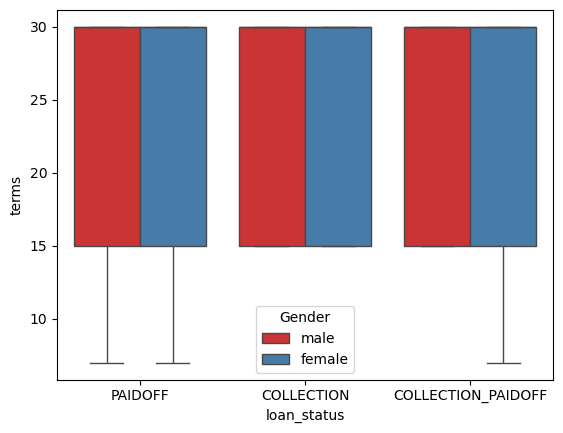

In [16]:
sns.boxplot(x='loan_status',y='terms',hue='Gender',data=l_df,palette='Set1')

##### loan terms vary by loan status gender.with term lengths for approved loans and more variation for defaults across genders.

<Axes: xlabel='loan_status', ylabel='terms'>

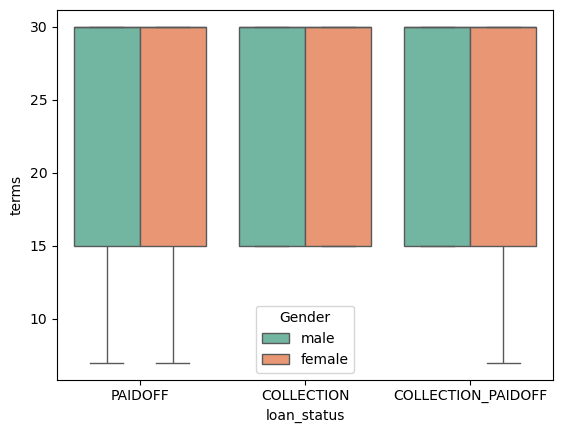

In [17]:
sns.boxplot(x='loan_status',y='terms',hue='Gender',data=l_df,palette='Set2')

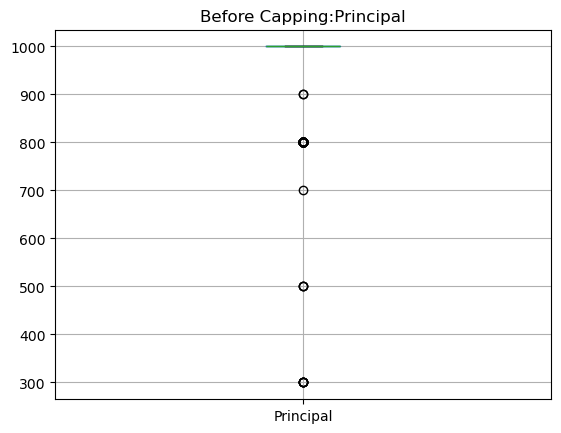

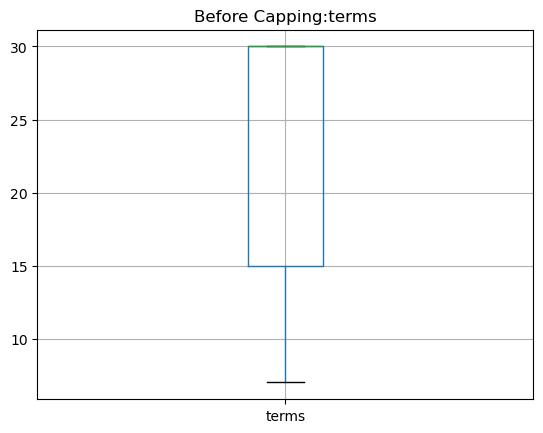

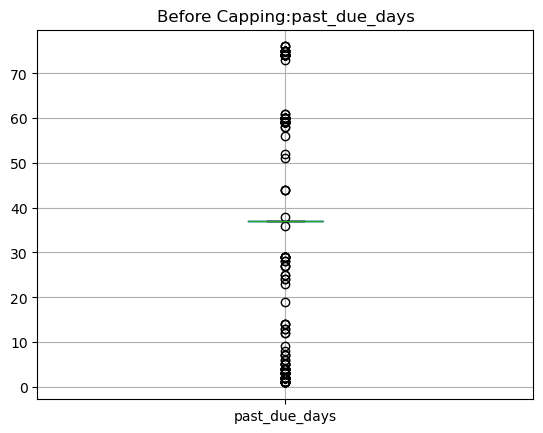

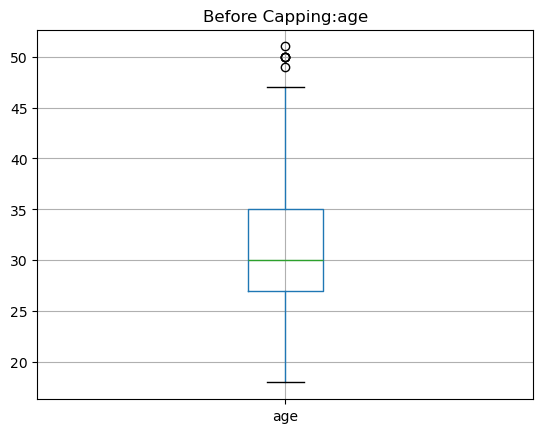

In [18]:
num=['Principal','terms','past_due_days','age']
for x in num:
    plt.figure()
    l_df.boxplot(column=[x])
    plt.title(f"Before Capping:{x}")
    plt.show()

##### decide whether to cap, tranform, or remove those outliers.
##### campare the effect before and after capping by re-plotting later.

In [19]:
for x in num:
    q1=l_df[x].quantile(0.25)
    q3=l_df[x].quantile(0.75)
    iqr=q3-q1
    lowercap=q1-1.5*iqr
    uppercap=q3+1.5*iqr
    l_df[x]=l_df[x].clip(lowercap,uppercap)

In [20]:
# The clip() function is used here for capping—not removing—outliers.
# It’s a safer alternative to dropping rows, especially when preserving data size is important.

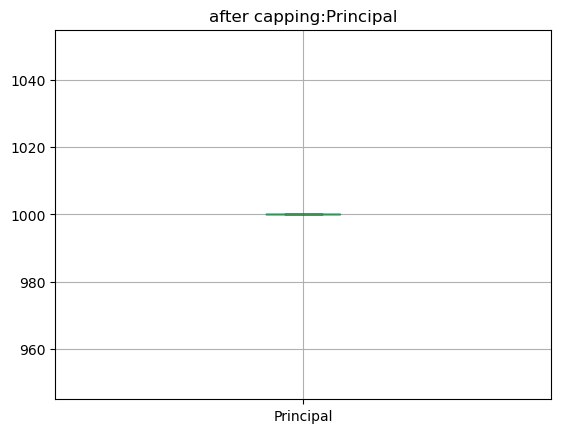

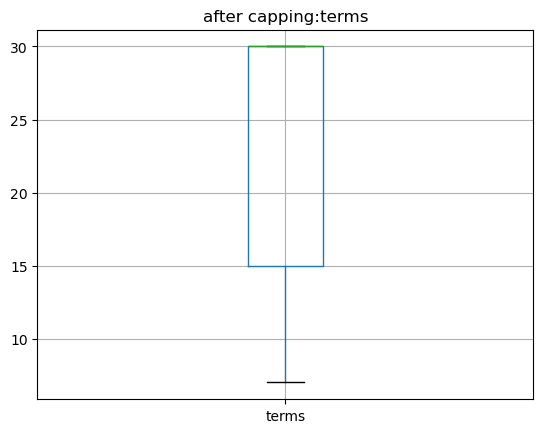

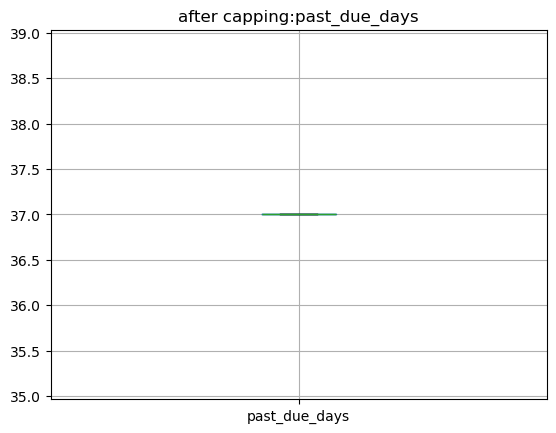

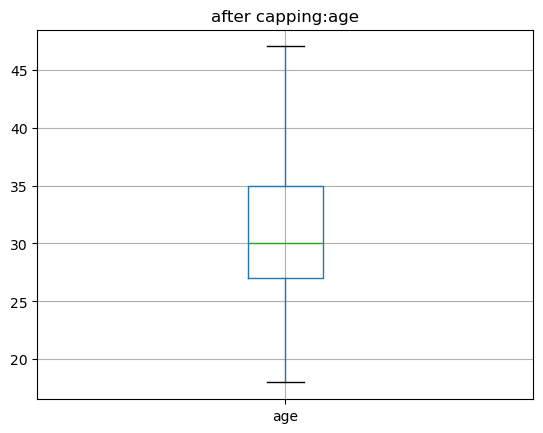

In [21]:
for x in num:
    plt.figure()
    l_df.boxplot(column=[x])
    plt.title(f"after capping:{x}")
    plt.show()

# Data Visualisation

### c) 1.Univariate Anlysis

C:\Users\2\AppData\Local\Temp\ipykernel_20292\704663743.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status',data=l_df,palette='Set1')


<Axes: xlabel='loan_status', ylabel='count'>

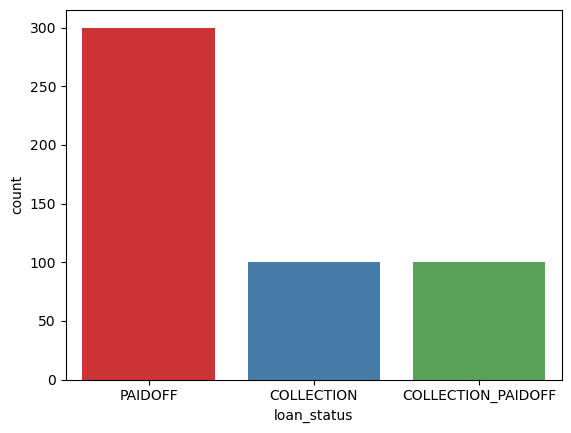

In [22]:
sns.countplot(x='loan_status',data=l_df,palette='Set1')

##### most loans are approved: fewer loans are defaulted

### 2. Bivariate Anlysis

<Axes: xlabel='loan_status', ylabel='count'>

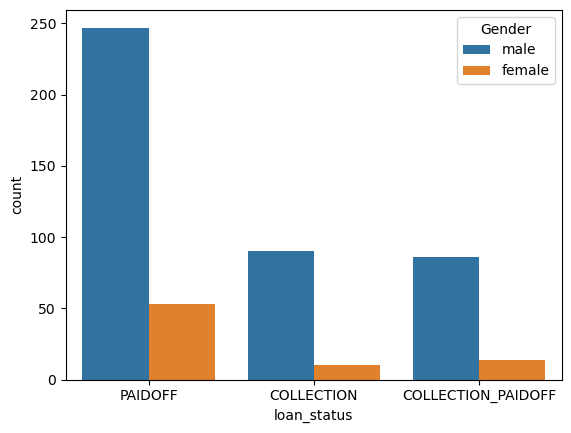

In [23]:
sns.countplot(x='loan_status',hue='Gender',data=l_df)

###### loan approvels are higher than defaults for both genders,with a slightly larger number of approved loans among males.

C:\Users\2\AppData\Local\Temp\ipykernel_20292\277226940.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status',y='age',data=l_df,palette='Set1')


<Axes: xlabel='loan_status', ylabel='age'>

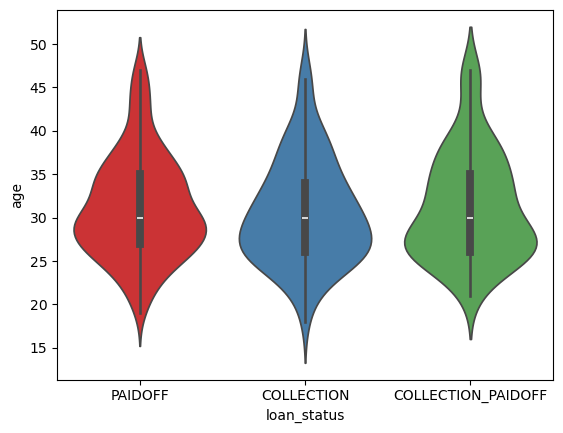

In [28]:
sns.violinplot(x='loan_status',y='age',data=l_df,palette='Set1')

##### violin plot showing the age distribution for each loan status in the `l_df` DataFrame. It helps compare how age varies across different loan outcomes, using the `Set1` color palette for clarity.


### 3.Multivariate Analysis

<Axes: >

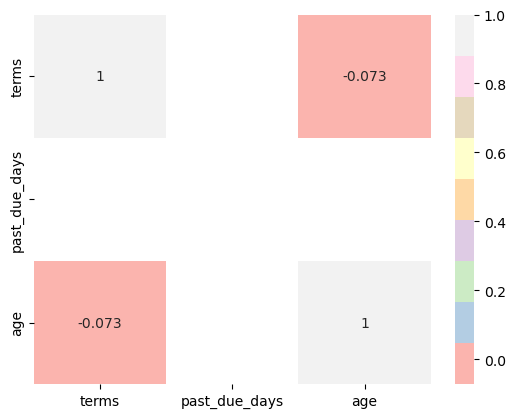

In [25]:
sns.heatmap(l_df[['terms','past_due_days','age']].corr(),annot=True,cmap='Pastel1')

##### longer loan terms slightly relate to more overdue days. age has little impact on loan length or delays.

<Axes: ylabel='loan_status'>

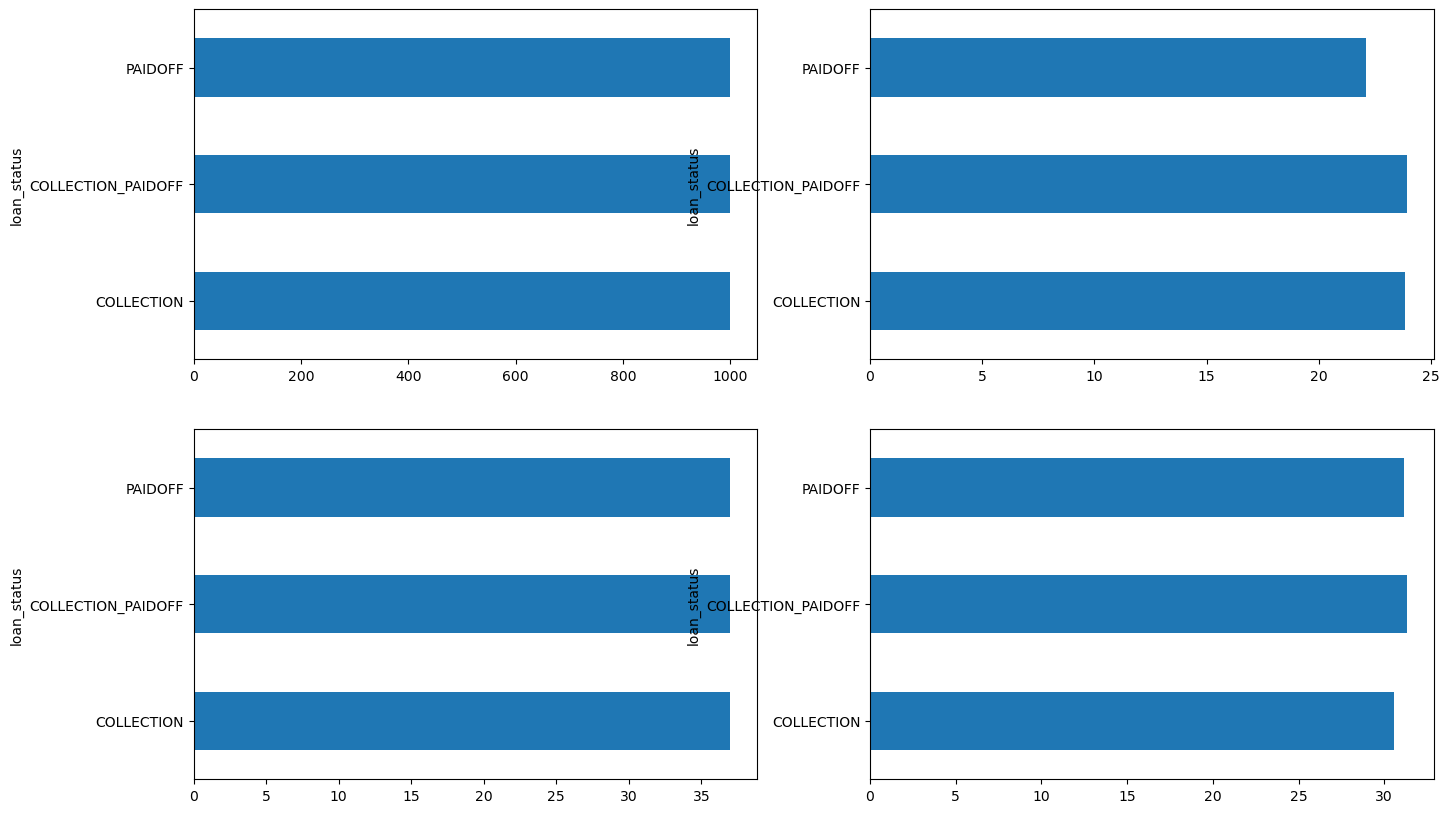

In [26]:
figbi, axesbi = plt.subplots(2, 2, figsize=(16, 10))
l_df.groupby('loan_status')['Principal'].mean().plot(kind='barh',ax=axesbi[0,0])
l_df.groupby('loan_status')['terms'].mean().plot(kind='barh',ax=axesbi[0,1])
l_df.groupby('loan_status')['past_due_days'].mean().plot(kind='barh',ax=axesbi[1,0])
l_df.groupby('loan_status')['age'].mean().plot(kind='barh',ax=axesbi[1,1])


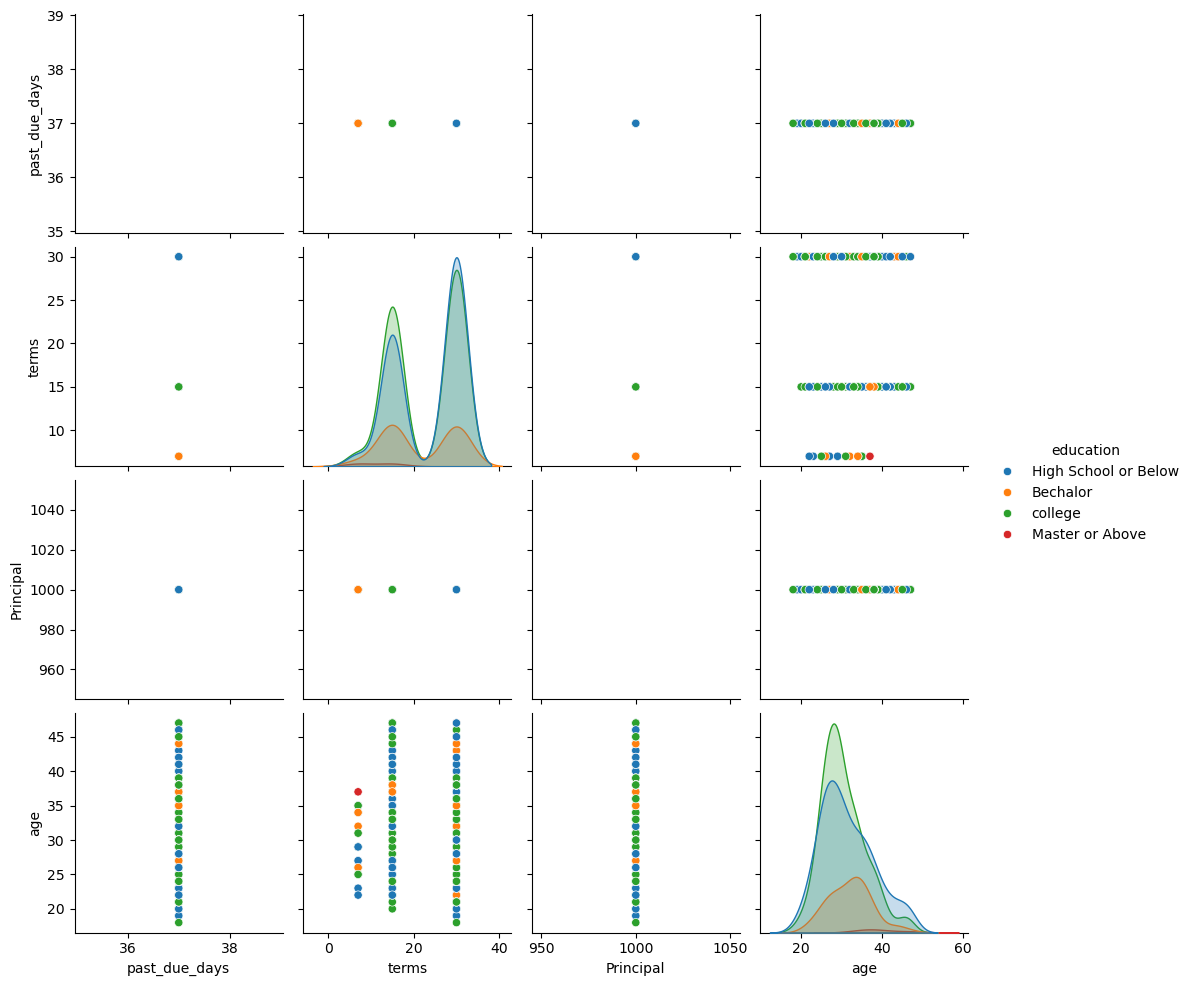

In [27]:
sns.pairplot(l_df[['past_due_days','terms','Principal','age','education']],hue='education')

###### pairplot shows relationships between past due days,loan terms,principal,and age across education levels.different education groups cluster distinctly.indicating education influences borrowing patterns and repayment behavior